<a href="https://colab.research.google.com/github/ioloi1128/CDA/blob/main/CDA_week10_EOF_partIII_globalSST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install xarray
!pip install matplotlib
!pip install scipy
!pip install pandas

!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

!apt-get -V -y -qq install python-cartopy python3-cartopy
!pip uninstall shapely -y
!pip install shapely --no-binary shapely

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (239 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state 

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [ ]:
!pip install eofs
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from eofs.xarray import Eof
from eofs.examples import example_data_path

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
  Created wheel for eofs: filename=eofs-1.4.0-py3-none-any.whl size=1100374 sha256=6bf728811c6b449089ece95294d57c00d8d51f0c7184cbb0ded2e162ddc4d472
  Stored in directory: /root/.cache/pip/wheels/ce/4e/36/2ef48d7342cd326d5f3bdb4ddd0441f06b387b5cbfc8336095
Successfully built eofs


In [ ]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url)

# select period
ds = ds.sel(time=slice('1900', '2020'))

#actually load the data
ds.load()

ds_climo=ds.groupby('time.month').mean()
ds_anoms=ds.groupby('time.month')-ds_climo
ds_anoms

ds_anoms=ds_anoms.reindex(lat=list(reversed(ds_anoms['lat'])))
ds_sst=ds_anoms.sel(lat=slice(-70,70),lon=slice(0,360))

sst = ds_sst['sst']

In [ ]:
# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(sst.coords['lat'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sst, weights=wgts)

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eofs = solver.eofsAsCorrelation(neofs=4)
pcs = solver.pcs(npcs=4, pcscaling=1)
vars = solver.varianceFraction(neigs=4)

In [ ]:
vars

<xarray.DataArray 'variance_fractions' (mode: 4)>
array([0.23239176, 0.10898237, 0.03367601, 0.03064902], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2 3
Attributes:
    long_name:  variance_fractions

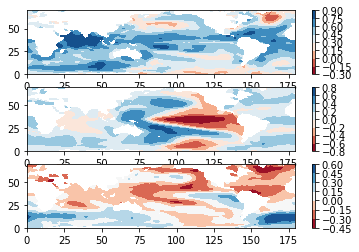

In [ ]:
nrows=3
ncols=1
clevs=np.arange(-20,21,10)

for i in np.arange(3):
    plt.subplot(nrows,ncols,i+1)
    plt.contourf(eofs[i,:,:],cmap='RdBu')
    plt.colorbar()

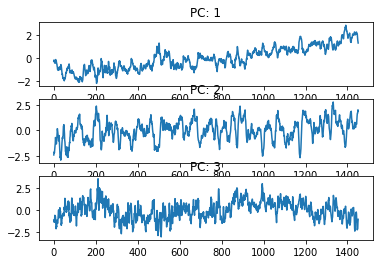

In [ ]:
nrows=3
ncols=1
clevs=np.arange(-20,21,10)

for i in np.arange(3):
    plt.subplot(nrows,ncols,i+1)
    pcnorm=pcs[:,i]
    plt.title('PC: '+str(i+1))
    plt.plot(pcnorm)

In [ ]:
reconstruction = solver.reconstructedField(2)

In [ ]:
reconstruction

<xarray.DataArray 'sst' (time: 1452, lat: 71, lon: 180)>
array([[[        nan, -0.03265337, -0.03093887, ..., -0.03702267,
         -0.02081867, -0.02360209],
        [-0.06344159, -0.07083108, -0.06129724, ..., -0.03079648,
         -0.0480082 , -0.05543782],
        [-0.04393718, -0.04787669, -0.05815858, ..., -0.04639571,
         -0.0324573 , -0.03451908],
        ...,
        [-0.20626478, -0.23737797, -0.28670228, ..., -0.2041619 ,
         -0.19973692, -0.1974252 ],
        [-0.2190634 , -0.24629739, -0.28421852, ..., -0.222074  ,
         -0.20503232, -0.20445624],
        [-0.25670892, -0.27831697, -0.31576395, ..., -0.27388987,
         -0.259404  , -0.25741926]],

       [[        nan, -0.02581939, -0.02454798, ..., -0.02952341,
         -0.01595131, -0.01765888],
        [-0.04878215, -0.05470867, -0.04687387, ..., -0.02266006,
         -0.0362088 , -0.04230405],
        [-0.03234288, -0.03578105, -0.04427596, ..., -0.03455957,
         -0.02206445, -0.02379073],
...
        [ 0.4107065 ,  0.4552607 ,  0.5253254 , ...,  0.37790984,
          0.3800837 ,  0.38823688],
        [ 0.42745963,  0.47207445,  0.53514993, ...,  0.39814025,
          0.39026648,  0.40040818],
        [ 0.45678362,  0.49446708,  0.55404985, ...,  0.45436892,
          0.44694474,  0.45154005]],

       [[        nan,  0.06918068,  0.06450263, ...,  0.07534578,
          0.05043922,  0.062458  ],
        [ 0.15155779,  0.16617633,  0.14965428, ...,  0.08623186,
          0.12345134,  0.13645492],
        [ 0.12285417,  0.12719038,  0.1444458 , ...,  0.12467889,
          0.11343814,  0.11661495],
        ...,
        [ 0.37837303,  0.4197965 ,  0.48495504, ...,  0.3487781 ,
          0.35054287,  0.3577778 ],
        [ 0.39399636,  0.43530706,  0.49368608, ...,  0.36775017,
          0.35993183,  0.36903057],
        [ 0.42200032,  0.4568328 ,  0.5120493 , ...,  0.4205691 ,
          0.4132654 ,  0.4173138 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2020-12-01
  * lat      (lat) float32 -70.0 -68.0 -66.0 -64.0 -62.0 ... 64.0 66.0 68.0 70.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:  sst_reconstructed_with_2_EOFs